In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.datasets import cifar10

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [22]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10438975419163569815
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7807696896
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5938688055363482464
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [4]:
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

In [5]:
X_train.shape[0]

50000

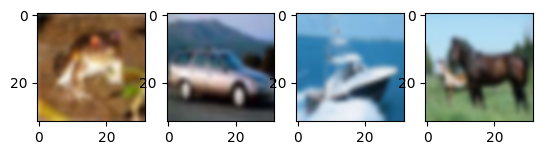

In [6]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [7]:
num_classes = 10

np_utils.to_categorical(y_train, num_classes)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
model1 = tf.keras.models.Sequential()

In [9]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))

model1.add(tf.keras.layers.GaussianNoise(stddev=0.15, seed = 552))
#conv1a
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv1b
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv1c
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool1
model1.add(tf.keras.layers.MaxPooling2D(2,2))
#drop1
model1.add(tf.keras.layers.Dropout(rate=0.5,seed = 159))



#conv2a
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv2b
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv2c
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool2
model1.add(tf.keras.layers.MaxPooling2D(2,2))
#drop2
model1.add(tf.keras.layers.Dropout(rate=0.5,seed = 357))



#conv3a
model1.add(tf.keras.layers.Conv2D(512,(3,3), padding = 'valid'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv3b
model1.add(tf.keras.layers.Conv2D(256,(1,1)))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv3c
model1.add(tf.keras.layers.Conv2D(128,(1,1)))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool3
model1.add(tf.keras.layers.GlobalAveragePooling2D())

#dense
model1.add(tf.keras.layers.Dense(10))

#output
model1.add(tf.keras.layers.Softmax())

In [10]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 32, 32, 3)        0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                      

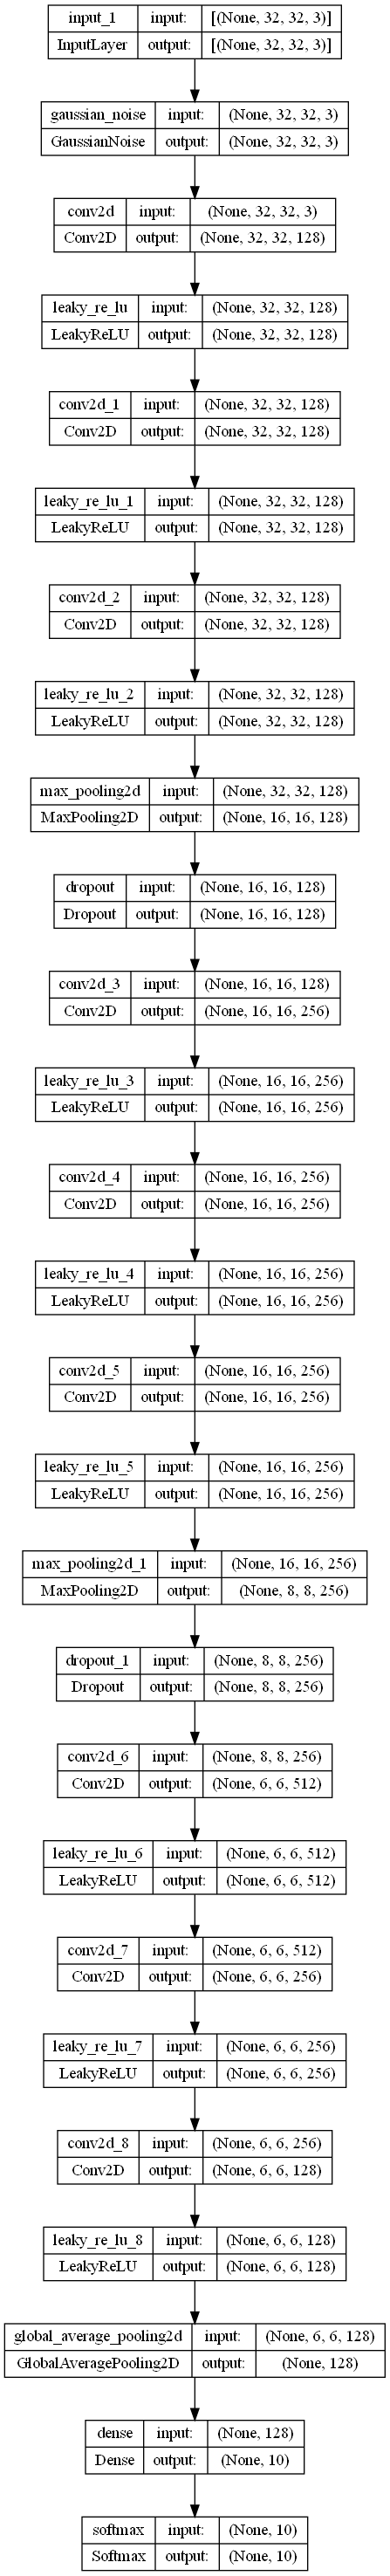

In [20]:
tf.keras.utils.plot_model(model1,"model.png",show_shapes=True)

In [ ]:
model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=1,batch_size=100)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.datasets import cifar10
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
img_input = keras.Input(shape=(32,32,3))

In [3]:
x = layers.GaussianNoise(stddev = 0.15)(img_input)
x = layers.Conv2D(128,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(128,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(128,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.MaxPool2D((2,2))(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Conv2D(256,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(256,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(256,(3,3),padding="same")(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.MaxPool2D((2,2))(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Conv2D(512,(3,3),padding="valid")(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(256,(1,1))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(128,(1,1))(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation = "Softmax")(x)

In [4]:
model = keras.Model(inputs=img_input, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 32, 32, 3)        0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                             

In [5]:
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, batch_size=300, epochs=2, validation_split=0.2)

test_scores = model.evaluate(X_test,y_test,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2


In [2]:
inputs = keras.Input(shape=(784,))

dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3521 - accuracy: 0.8998 - val_loss: 0.2030 - val_accuracy: 0.9414
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9511 - val_loss: 0.1458 - val_accuracy: 0.9582
313/313 - 0s - loss: 0.1381 - accuracy: 0.9565 - 481ms/epoch - 2ms/step
Test loss: 0.13807187974452972
Test accuracy: 0.9564999938011169


In [5]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [6]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

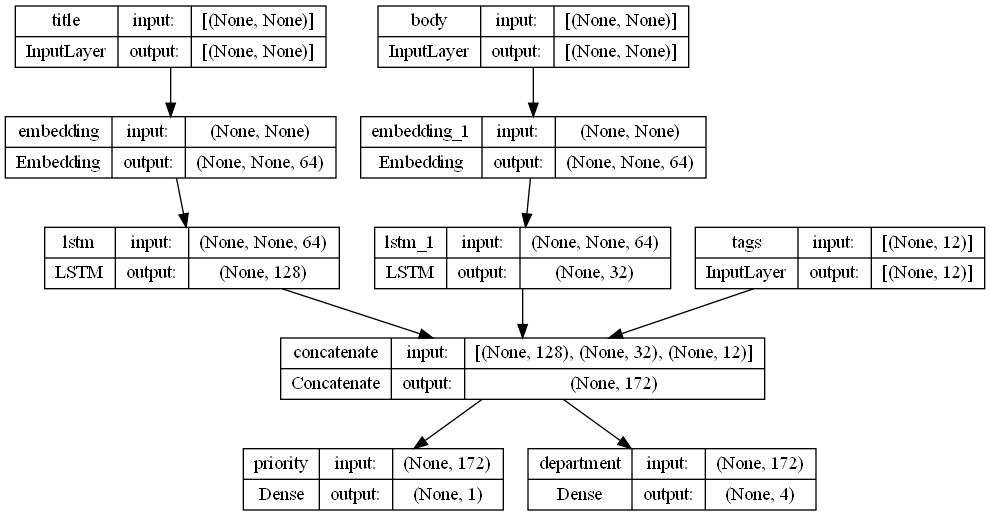

In [7]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [8]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

In [9]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

In [10]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 4s 13ms/step - loss: 1.2601 - priority_loss: 0.6994 - department_loss: 2.8036
Epoch 2/2
40/40 [==============================] - 0s 10ms/step - loss: 1.2583 - priority_loss: 0.6995 - department_loss: 2.7939


In [13]:
#사용할 라이브러리 불러오기
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10, mnist
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# CNN 및 MLP에 필요한 각 층들
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# 드롭아웃 적용을 위한 층
from keras.layers import Dropout
# 배치 정규화 적용을 위한 층
from keras.layers import BatchNormalization
# L2 정규화를 위한 라이브러리
from keras.regularizers import l2

In [14]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


In [15]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [16]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN_Upgraded')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
# padding : 'same'일 경우 입력과 출력 모양이 같도록 0을 주변에 덧댄다
# elu : ReLU 보다 발전된 형태의 활성화 함수 ELU를 써봅니다
# kernel_regularizer : 가중치 규제를 정해줄 수 있습니다. / l2(lambda) : 가중치의 L2 Norm을 목적 함수에 추가하며, lambda에 따라 곱해지는 상수값을 정합니다.
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001),
                 input_shape=(width, height, channel), activation='elu'))
model.add(BatchNormalization()) # BatchNormalization() : 배치 정규화를 위한 층을 추가합니다
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Dropout(rate) : 앞의 층에 드롭아웃을 적용합니다. rate 값에 따라 없애고 학습할 노드 비율을 정합니다.
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN_Upgraded"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
